In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams["font.family"] = "Helvetica"

rc('text', usetex=False)

In [146]:
mi_range = [2**(x) for x in range(-10, 0)]

labels = [-np.log2(x) for x in mi_range]
# print(labels)

c_range = [1/(2*mi) for mi in mi_range]

In [147]:
# c_range.reverse()
c_range

[512.0, 256.0, 128.0, 64.0, 32.0, 16.0, 8.0, 4.0, 2.0, 1.0]

In [148]:
labels

[10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]

In [149]:
mses = {}
for C in c_range:
    mses.update(pickle.load(open(f'data2/C={C}_wine_mses.pkl', 'rb')))

In [150]:
mses.keys()

dict_keys([512.0, 256.0, 128.0, 64.0, 32.0, 16.0, 8.0, 4.0, 2.0, 1.0])

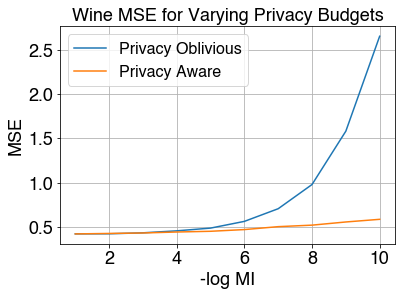

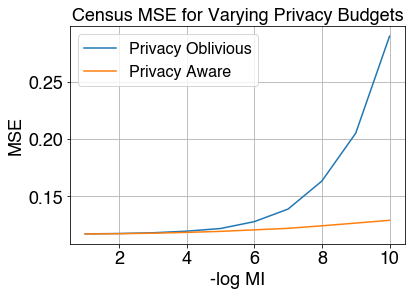

In [151]:
for data in ['Wine', 'Census']:
    mi_range = [2**(x) for x in range(-10, 0)]

    labels = [-np.log2(x) for x in mi_range]

    c_range = [1/(2*mi) for mi in mi_range]
    mses = {}
    for C in c_range:
        mses.update(pickle.load(open(f'data/C={C}_{data.lower()}_mses.pkl', 'rb')))
    xs = []
    priv_aware = []
    priv_obl = []
    for i, c in enumerate(c_range):
        xs.append(labels[i])
        priv_obl.append(np.average(mses[c][0]))
        priv_aware.append(np.average(mses[c][1]))
    plt.plot(xs, priv_obl, label=f'Privacy Oblivious')
    plt.plot(xs, priv_aware, label='Privacy Aware')
    plt.grid(True)
    plt.tick_params(axis='both', labelsize=18)
    plt.xlabel("-log MI", fontsize=18)
    plt.ylabel("MSE", fontsize=18)
    plt.legend(fontsize=16)
    plt.title(f"{data} MSE for Varying Privacy Budgets", fontsize=18)
    plt.show()

In [131]:
d1 = pickle.load(open('data/C=0.25_census_lams.pkl', 'rb'))

In [132]:
d

{0: [11.626716736249357,
  6999.626021606106,
  5.587464306681777,
  12.87023722505132,
  29.873730739757562,
  11.536361083615478,
  831.0115939780933,
  7617.175156412599,
  132.7509796676647,
  33.59158729409444,
  991.152669196938,
  2282.3576421050516,
  5712.379929465226,
  99.04946603921454,
  84.39259659462373,
  387.9044555885089,
  505.52165419726214,
  282.7661594639618,
  187.6290054379038,
  198.44215960471894,
  164565.7398234669,
  5034.19767553315,
  18.161892503555265,
  35.897609069290326,
  36.15674651520621,
  20.97773972759604,
  1691.145561462976,
  26.71647834512935,
  152.05259800142463,
  1613748.7202223742,
  3.166115460425274,
  337.36148896316945,
  6.1905390951502755,
  101.73844489526836,
  149.49496449705762,
  5712.379929465132,
  9099.09034184094,
  13.655218746927735,
  222.6738960707855,
  81.56299282465696,
  124.68024399162825,
  26.580330199159153,
  485.0116131444097,
  18.351270265357197,
  1262.6303748015393,
  1539.3316946449418,
  1699.2360794

In [130]:
d2 = pickle.load(open('data/C=0.5_census_lams.pkl', 'rb'))

In [134]:
np.array(d2[0]) - np.array(d1[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])